## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0   7.572396  1131.506064  0.298364   3.035363  1.442249
1  34.560306  1139.048033  0.903904  10.200027  1.406213
2  62.318720  1517.215921  0.185876   3.840956  1.585973
3  54.455280   473.188631  0.717872   4.148459  1.610674
4  45.033364  1059.247750  0.435567   3.155914  1.301505


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9459949	total: 64ms	remaining: 1m 3s
1:	learn: 0.9367355	total: 65.2ms	remaining: 32.5s
2:	learn: 0.9267357	total: 66.3ms	remaining: 22s
3:	learn: 0.9172291	total: 67.4ms	remaining: 16.8s
4:	learn: 0.9053438	total: 68.2ms	remaining: 13.6s
5:	learn: 0.8962068	total: 68.8ms	remaining: 11.4s
6:	learn: 0.8863018	total: 69.5ms	remaining: 9.86s
7:	learn: 0.8757760	total: 70.2ms	remaining: 8.7s
8:	learn: 0.8671969	total: 70.9ms	remaining: 7.8s
9:	learn: 0.8572105	total: 71.8ms	remaining: 7.11s
10:	learn: 0.8485598	total: 72.4ms	remaining: 6.51s
11:	learn: 0.8380477	total: 73.1ms	remaining: 6.01s
12:	learn: 0.8289327	total: 73.6ms	remaining: 5.59s
13:	learn: 0.8212700	total: 74ms	remaining: 5.21s
14:	learn: 0.8136611	total: 74.5ms	remaining: 4.89s
15:	learn: 0.8069090	total: 75.1ms	remaining: 4.62s
16:	learn: 0.7969440	total: 75.6ms	remaining: 4.37s
17:	learn: 0.7881414	total: 76.2ms	remaining: 4.16s
18:	learn: 0.7829064	total: 76.7ms	remaining: 3.96s


33:	learn: 0.6812743	total: 84.9ms	remaining: 2.41s
34:	learn: 0.6765228	total: 86ms	remaining: 2.37s
35:	learn: 0.6710721	total: 86.4ms	remaining: 2.31s
36:	learn: 0.6649217	total: 87.2ms	remaining: 2.27s
37:	learn: 0.6599689	total: 87.7ms	remaining: 2.22s
38:	learn: 0.6533888	total: 88.3ms	remaining: 2.17s
39:	learn: 0.6488117	total: 88.8ms	remaining: 2.13s
40:	learn: 0.6438194	total: 89.3ms	remaining: 2.09s
41:	learn: 0.6385724	total: 89.9ms	remaining: 2.05s
42:	learn: 0.6321612	total: 90.4ms	remaining: 2.01s
43:	learn: 0.6265403	total: 90.9ms	remaining: 1.98s
44:	learn: 0.6220526	total: 91.4ms	remaining: 1.94s
45:	learn: 0.6168098	total: 92.1ms	remaining: 1.91s
46:	learn: 0.6124925	total: 92.7ms	remaining: 1.88s
47:	learn: 0.6064401	total: 93.2ms	remaining: 1.85s
48:	learn: 0.6014637	total: 93.8ms	remaining: 1.82s
49:	learn: 0.5973063	total: 94.2ms	remaining: 1.79s
50:	learn: 0.5938376	total: 94.7ms	remaining: 1.76s
51:	learn: 0.5890729	total: 95.2ms	remaining: 1.74s
52:	learn: 0.5

206:	learn: 0.2346788	total: 161ms	remaining: 618ms
207:	learn: 0.2338452	total: 162ms	remaining: 616ms
208:	learn: 0.2329805	total: 162ms	remaining: 614ms
209:	learn: 0.2317171	total: 163ms	remaining: 612ms
210:	learn: 0.2306869	total: 163ms	remaining: 610ms
211:	learn: 0.2295195	total: 163ms	remaining: 607ms
212:	learn: 0.2282929	total: 164ms	remaining: 605ms
213:	learn: 0.2271503	total: 164ms	remaining: 603ms
214:	learn: 0.2259033	total: 165ms	remaining: 601ms
215:	learn: 0.2250245	total: 165ms	remaining: 599ms
216:	learn: 0.2245255	total: 165ms	remaining: 596ms
217:	learn: 0.2236911	total: 166ms	remaining: 595ms
218:	learn: 0.2228200	total: 166ms	remaining: 593ms
219:	learn: 0.2219292	total: 167ms	remaining: 591ms
220:	learn: 0.2209590	total: 167ms	remaining: 588ms
221:	learn: 0.2199140	total: 167ms	remaining: 586ms
222:	learn: 0.2189720	total: 168ms	remaining: 584ms
223:	learn: 0.2179193	total: 168ms	remaining: 582ms
224:	learn: 0.2167795	total: 169ms	remaining: 580ms
225:	learn: 

380:	learn: 0.1301211	total: 232ms	remaining: 378ms
381:	learn: 0.1298093	total: 233ms	remaining: 377ms
382:	learn: 0.1289923	total: 233ms	remaining: 376ms
383:	learn: 0.1284772	total: 234ms	remaining: 375ms
384:	learn: 0.1281257	total: 234ms	remaining: 374ms
385:	learn: 0.1276372	total: 235ms	remaining: 374ms
386:	learn: 0.1271391	total: 235ms	remaining: 373ms
387:	learn: 0.1267993	total: 236ms	remaining: 372ms
388:	learn: 0.1263277	total: 236ms	remaining: 371ms
389:	learn: 0.1258081	total: 237ms	remaining: 370ms
390:	learn: 0.1253283	total: 237ms	remaining: 369ms
391:	learn: 0.1249990	total: 237ms	remaining: 368ms
392:	learn: 0.1245319	total: 238ms	remaining: 367ms
393:	learn: 0.1240678	total: 238ms	remaining: 367ms
394:	learn: 0.1235946	total: 239ms	remaining: 366ms
395:	learn: 0.1230130	total: 239ms	remaining: 365ms
396:	learn: 0.1227658	total: 240ms	remaining: 364ms
397:	learn: 0.1223184	total: 240ms	remaining: 363ms
398:	learn: 0.1214732	total: 240ms	remaining: 362ms
399:	learn: 

573:	learn: 0.0699215	total: 315ms	remaining: 234ms
574:	learn: 0.0697819	total: 316ms	remaining: 233ms
575:	learn: 0.0696457	total: 316ms	remaining: 233ms
576:	learn: 0.0694636	total: 317ms	remaining: 232ms
577:	learn: 0.0693305	total: 317ms	remaining: 232ms
578:	learn: 0.0692002	total: 318ms	remaining: 231ms
579:	learn: 0.0689799	total: 318ms	remaining: 230ms
580:	learn: 0.0688142	total: 319ms	remaining: 230ms
581:	learn: 0.0687078	total: 319ms	remaining: 229ms
582:	learn: 0.0685541	total: 319ms	remaining: 228ms
583:	learn: 0.0685068	total: 320ms	remaining: 228ms
584:	learn: 0.0682934	total: 320ms	remaining: 227ms
585:	learn: 0.0681527	total: 321ms	remaining: 226ms
586:	learn: 0.0681065	total: 321ms	remaining: 226ms
587:	learn: 0.0680610	total: 321ms	remaining: 225ms
588:	learn: 0.0680162	total: 322ms	remaining: 225ms
589:	learn: 0.0678219	total: 322ms	remaining: 224ms
590:	learn: 0.0677779	total: 323ms	remaining: 223ms
591:	learn: 0.0675720	total: 323ms	remaining: 223ms
592:	learn: 

758:	learn: 0.0475667	total: 395ms	remaining: 125ms
759:	learn: 0.0472774	total: 395ms	remaining: 125ms
760:	learn: 0.0471019	total: 396ms	remaining: 124ms
761:	learn: 0.0470376	total: 396ms	remaining: 124ms
762:	learn: 0.0467544	total: 397ms	remaining: 123ms
763:	learn: 0.0467181	total: 397ms	remaining: 123ms
764:	learn: 0.0466104	total: 398ms	remaining: 122ms
765:	learn: 0.0464866	total: 398ms	remaining: 122ms
766:	learn: 0.0462095	total: 399ms	remaining: 121ms
767:	learn: 0.0461739	total: 399ms	remaining: 121ms
768:	learn: 0.0459019	total: 400ms	remaining: 120ms
769:	learn: 0.0457812	total: 400ms	remaining: 119ms
770:	learn: 0.0457464	total: 400ms	remaining: 119ms
771:	learn: 0.0454802	total: 401ms	remaining: 118ms
772:	learn: 0.0454460	total: 401ms	remaining: 118ms
773:	learn: 0.0453416	total: 402ms	remaining: 117ms
774:	learn: 0.0452374	total: 402ms	remaining: 117ms
775:	learn: 0.0451764	total: 402ms	remaining: 116ms
776:	learn: 0.0451426	total: 403ms	remaining: 116ms
777:	learn: 

959:	learn: 0.0279536	total: 477ms	remaining: 19.9ms
960:	learn: 0.0279239	total: 478ms	remaining: 19.4ms
961:	learn: 0.0278826	total: 478ms	remaining: 18.9ms
962:	learn: 0.0278647	total: 479ms	remaining: 18.4ms
963:	learn: 0.0278457	total: 479ms	remaining: 17.9ms
964:	learn: 0.0278275	total: 479ms	remaining: 17.4ms
965:	learn: 0.0278039	total: 480ms	remaining: 16.9ms
966:	learn: 0.0276773	total: 480ms	remaining: 16.4ms
967:	learn: 0.0276367	total: 481ms	remaining: 15.9ms
968:	learn: 0.0275989	total: 481ms	remaining: 15.4ms
969:	learn: 0.0275803	total: 482ms	remaining: 14.9ms
970:	learn: 0.0275624	total: 482ms	remaining: 14.4ms
971:	learn: 0.0274844	total: 482ms	remaining: 13.9ms
972:	learn: 0.0274555	total: 483ms	remaining: 13.4ms
973:	learn: 0.0274379	total: 483ms	remaining: 12.9ms
974:	learn: 0.0273456	total: 484ms	remaining: 12.4ms
975:	learn: 0.0272698	total: 484ms	remaining: 11.9ms
976:	learn: 0.0272417	total: 484ms	remaining: 11.4ms
977:	learn: 0.0271228	total: 485ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4279899493037817


ABC Pre-generator MAE 1.1429592865648028


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

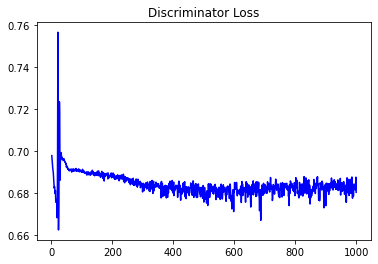

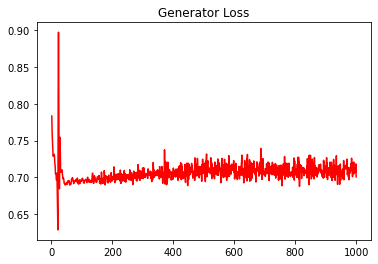

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.42780539179593324


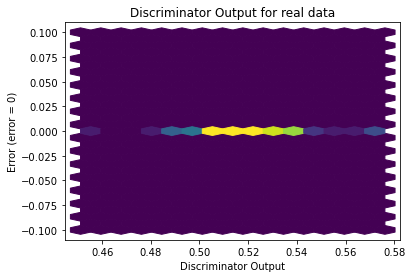

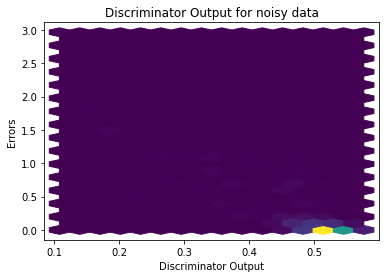

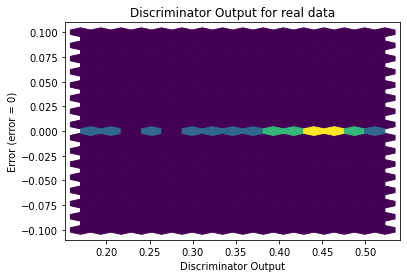

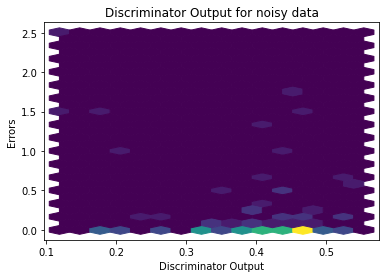

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

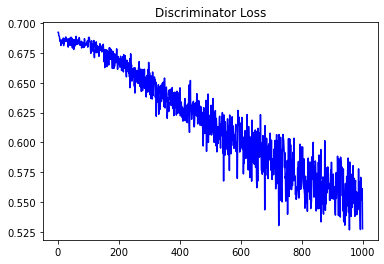

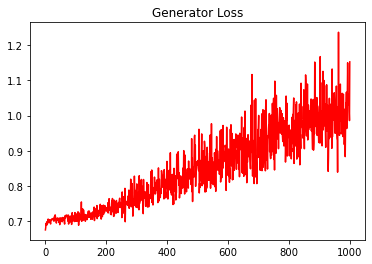

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5119190243654884


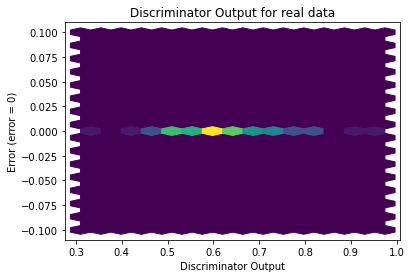

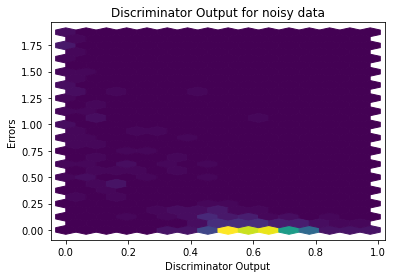

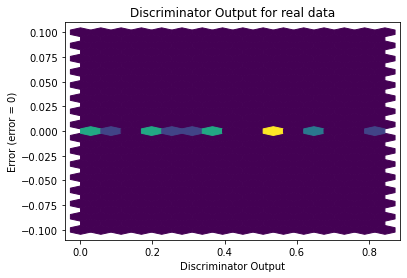

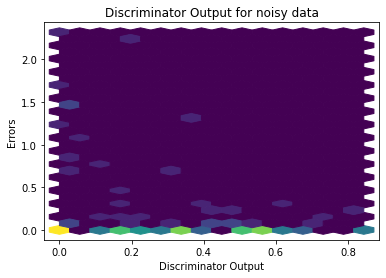

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


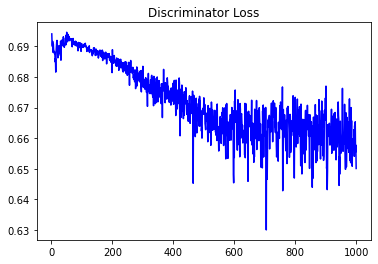

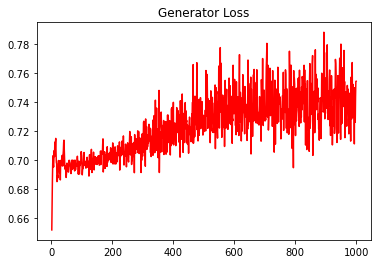

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.4723596869586036


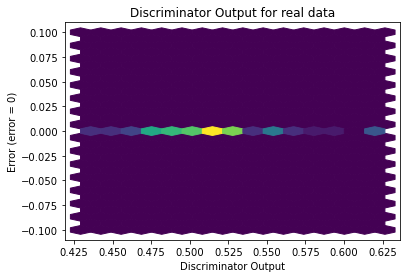

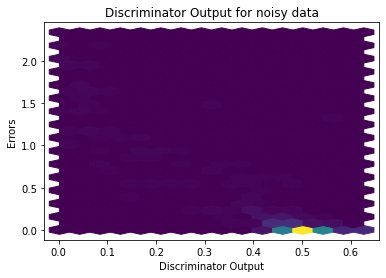

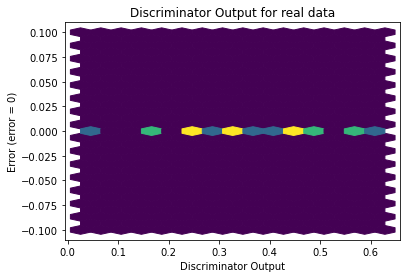

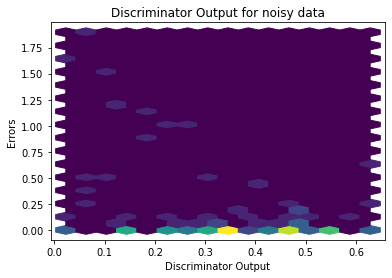

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


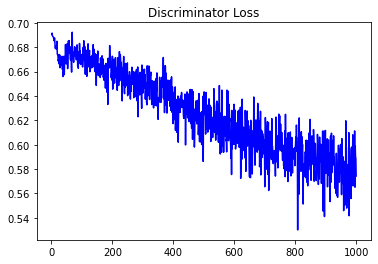

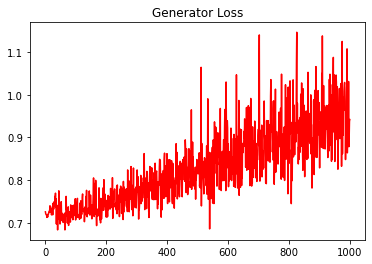

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.404155569457449


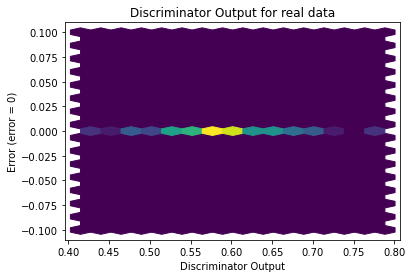

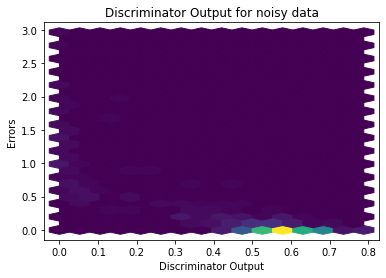

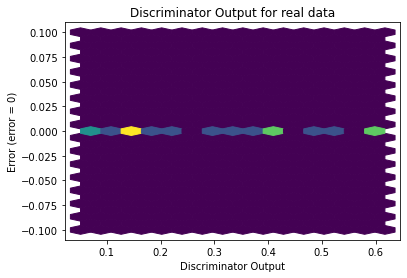

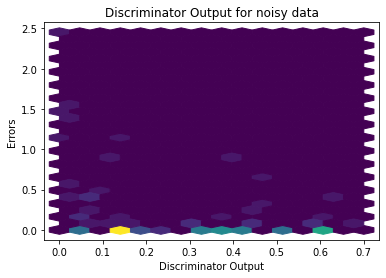

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1789]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6898]], requires_grad=True)
